In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import norm, skew

In [69]:
conversion = pd.read_table('Data/conversion_data.csv',sep = ',')
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [70]:
conversion.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [32]:
#missing value check
conversion.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

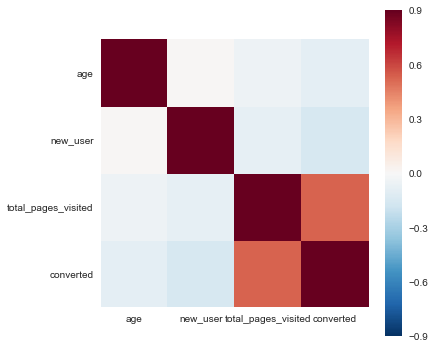

In [33]:
corrmat = conversion.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [49]:
conversion = pd.get_dummies(conversion)
train_df,test_df = train_test_split(conversion, test_size=0.3, random_state=0)
y_trn = train_df['converted']
y_tst = test_df['converted']
X_trn  = train_df.drop(['converted'], axis=1)
X_tst  = test_df.drop(['converted'], axis=1)

## Modelling 

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_trn)
    rmse= np.sqrt(-cross_val_score(model, X_trn, y_trn, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [59]:

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1473 (0.0012)



In [63]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nElastic Net score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net score: 0.1473 (0.0012)



In [64]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 